Code was taken from https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [22]:
#Dependencies:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

We will be using the well-known "iris.csv" dataset downloaded from "jbrownlee". We can then execute code to view the size of the array, as well as the first several rows of the dataset. 

In [23]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
print("Dimensions:",dataset.shape)
print(dataset.head())
#View number of rows per class
print(dataset.groupby('class').size())

Dimensions: (150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Based on the organized classes listed above, this dataset revolves around iris flower measurements relating to their species. We now have to divide the dataset into x and y vectors.

In [24]:
array = dataset.values
X = array[:,0:4]
print("X values:")
print("Type:", type(X))
print(X[:10])
Y = array[:,4]
print("y values:")
print("Type:", type(Y))
print(Y[:10])

X values:
Type: <class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y values:
Type: <class 'numpy.ndarray'>
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Split dataset into two: one training and one testing dataset. The testing dataset will be omitted from training.

In [38]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20 ,random_state=1)
#Let's see what the training and testing datasets look like:
#X training:
print("X_train:")
print(type(X_train))
print(X_train[:10])
#X_validation
print("X_validation:")
print(type(X_validation))
print(X_validation[:10])
#Y training
print("Y_train:")
print(type(Y_train))
print(Y_train[:10])
#Y_validation
print("Y_validation:")
print(type(Y_validation))
print(Y_validation[:10])

X_train:
<class 'numpy.ndarray'>
[[6.1 3.0 4.6 1.4]
 [7.7 3.0 6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.0 1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]]
X_validation:
<class 'numpy.ndarray'>
[[5.8 4.0 1.2 0.2]
 [5.1 2.5 3.0 1.1]
 [6.6 3.0 4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2.0]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]]
Y_train:
<class 'numpy.ndarray'>
['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
Y_validation:
<class 'numpy.ndarray'>
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


The training and testing datasets seem identical to the original datasets in type and structure. 

In [30]:
#Each entry in this list is composed of its own sklearn model. 
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

<class 'list'>


Next, loop through all models and apply 

In [37]:
results = []
names = []
for name, model in models:
    print('Name:',name)
    print('Model:', model)
    print('Type:',type(model))
    #kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print("==========================================================")

Name: LR
Model: LogisticRegression(multi_class='ovr', solver='liblinear')
Type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
LR: 0.941667 (0.065085)
Name: LDA
Model: LinearDiscriminantAnalysis()
Type: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
LDA: 0.975000 (0.038188)
Name: KNN
Model: KNeighborsClassifier()
Type: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
KNN: 0.958333 (0.041667)
Name: CART
Model: DecisionTreeClassifier()
Type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CART: 0.941667 (0.053359)
Name: NB
Model: GaussianNB()
Type: <class 'sklearn.naive_bayes.GaussianNB'>
NB: 0.950000 (0.055277)
Name: SVM
Model: SVC(gamma='auto')
Type: <class 'sklearn.svm._classes.SVC'>
SVM: 0.983333 (0.033333)


/home/misumicurieco/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/misumicurieco/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no lo

SVM seems to have the highest accuracy score (98%), but let's represent visually the performance of the other models:

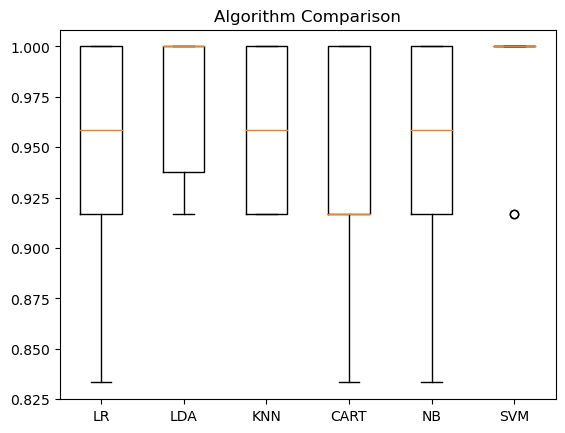

In [39]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Now we will apply our highest-scoring model (SVM) to the entire dataset. According to this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html, 

In [100]:
#Instantiate a new 'sklearn.svm._classes.SVC' object
model = SVC(gamma = 'auto')
model.fit(X_train, Y_train)
#printing the training sets here just as a reminder :^)
print("X_train: \n %s \n\
(Each row in X_train relates to petal, sepal, etc measurements for that iris) \
    \n Dimensions: \n %s \n" % (X_train[:5],X_train.shape))

#print("(Each row in X_train relates to petal, sepal, etc measurements for that iris)\n")
print("Y_train: \n %s \n \
(Each element in Y_train represents the recorded species for that row)\
    \n Dimensions: \n %s \n" % (Y_train[:5], Y_train.shape))
model_params = (model.get_params(deep=True))
print("Model Params: \n %s \n" % (model_params))
model_pred = model.predict(X_validation)
print("Vector length: \n %s \n" % (predictions.size))


print("The prediction vector:\n",predictions)

X_train: 
 [[6.1 3.0 4.6 1.4]
 [7.7 3.0 6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]] 
(Each row in X_train relates to petal, sepal, etc measurements for that iris)     
 Dimensions: 
 (120, 4) 

Y_train: 
 ['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica'] 
 (Each element in Y_train represents the recorded species for that row)    
 Dimensions: 
 (120,) 

Model Params: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 

Vector length: 
 30 

The prediction vector:
 ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-

Now we will assess the accuracy of this vector.

In [105]:
# Evaluate predictions
print("Accuracy score:\n",accuracy_score(Y_validation, predictions))
print("\n")
print("Confusion matrix:\n",confusion_matrix(Y_validation, predictions))
print("\n")
print("Classification mode:\n \n",classification_report(Y_validation, predictions))

Accuracy score:
 0.9666666666666667


Confusion matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Classification mode:
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

